In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from datetime import datetime
import bs4
import pandas as pd

# Data EDA

In [2]:
df = pd.read_json('reviews.json')

In [3]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,Pattern: LED Flashlight 2P,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,Pattern: LED Flashlight 2P,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
10,Pattern: LED Flashlight 2P,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
100,Pattern: LED Flashlight 2P,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
101,Pattern: 4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


The index is mess since I did not set up it when I scrape the data. I will reset the index.

In [4]:
df = df.reset_index(drop=True) 

In [5]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,Pattern: LED Flashlight 2P,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,Pattern: LED Flashlight 2P,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
2,Pattern: LED Flashlight 2P,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
3,Pattern: LED Flashlight 2P,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
4,Pattern: 4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


##### Definition
- product_pattern: different pack of LED lighting
- review_date: the date author published the review
- review_id: id for each review
- review_rating: rating(1 to 5 scores)
- review_text: body of reviews
- review_title: tiltle of reviews
- user_id: id for each author
- user_name: name for each author

In [6]:
df.count()

product_pattern    742
review_date        742
review_id          742
review_rating      742
review_text        742
review_title       742
user_id            742
user_name          742
dtype: int64

- Total observations: 742

In [7]:
df.isnull().values.any()

False

- all of them are valid

In [8]:
df.nunique()

product_pattern      3
review_date        313
review_id          742
review_rating        5
review_text        732
review_title       480
user_id            742
user_name          645
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
product_pattern    742 non-null object
review_date        742 non-null object
review_id          742 non-null object
review_rating      742 non-null int64
review_text        742 non-null object
review_title       742 non-null object
user_id            742 non-null object
user_name          742 non-null object
dtypes: int64(1), object(7)
memory usage: 46.5+ KB


In [10]:
df.describe()

,review_rating
count,742.000000
mean,4.164420
std,1.332628
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Only rating is the numerical data and the other are catogorical data.   
Now, I would like to check each column seperately.

- product_pattern

In [11]:
df.product_pattern.unique()

array(['Pattern: LED Flashlight 2P', 'Pattern: 4 pack', 'Pattern: 6 pack'], dtype=object)

The only different among these three types of product is the number of flashlight in a set. So I will simplify it.

In [12]:
df = df.replace({'Pattern: LED Flashlight 2P':'2',
         'Pattern: 4 pack':'4', 
         'Pattern: 6 pack':'6'})

In [13]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,2,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,2,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
2,2,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
3,2,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
4,4,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


- review_date check
Convert the str to datetime

In [14]:
df.review_date=  pd.to_datetime(df.review_date)

In [15]:
df.review_date[5].month

8

In [16]:
df[df.review_date < '2017-01-01']

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name


There are not any reviews before 2017-01-01. 

- review_id

In [17]:
len(df.review_id.unique())

742

- review_rating

In [18]:
df.review_rating.unique()

array([5, 4, 1, 3, 2])

In [19]:
rating = pd.DataFrame(df.review_rating.value_counts().head(5))
rating.reset_index(level=0, inplace = True)
rating.columns=['rating', 'count']
rating

,rating,count
0,5,473
1,4,104
2,1,70
3,3,49
4,2,46


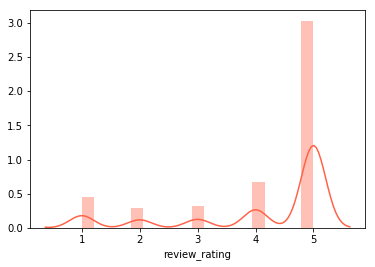

In [20]:
sns.distplot(df.review_rating, color = 'tomato')
plt.show()

The review rating from Amazon is from 1 star to 5 stars. The difference between each of them might be very slightly and noisy. So I decide to convert the 1-5 scores ranges into Low, Nutral and High layer ranges.

- Low: 1-2 Stars
- Neutral: 3 Stars
- High: 4-5 Stars

In [21]:
new_layer = ['low','neutral','high']
def new_y(y):
    if y<=2.0:
        return new_layer[0]
    elif y>=4.0:
        return new_layer[2]
    else:
        return new_layer[1]

df['new_layer'] = df['review_rating'].apply(new_y)

df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name,new_layer
0,2,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy,high
1,2,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB,high
2,2,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky,high
3,2,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins,high
4,4,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911,high


- review_text

In [22]:
len(df.review_text.unique())

732

In [23]:
review_text = pd.DataFrame(df.review_text.value_counts().head(10))
review_text = pd.DataFrame(review_text.head(7))
review_text.reset_index(level=0, inplace = True)
review_text.columns = ['text', 'count']

In [24]:
review_text

,text,count
0,Great product,4
1,Very bright and compact,3
2,very good,2
3,perfect,2
4,Very good.,2
5,Perfect,2
6,good,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


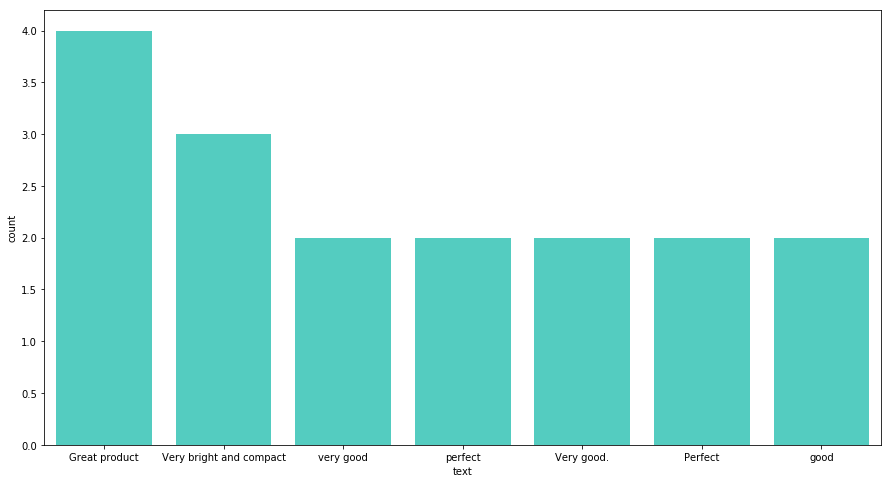

In [25]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="text", y="count", data=review_text,
            label="Reviews Duplicate", color="turquoise",ax = ax)
plt.show()

There are multiple reviews only contains few words. I would like to remove those reviews with words less than 15.

In [26]:
df = df[df['review_text'].apply(lambda x: len(x.split())>=15)]

In [27]:
len(df)

381

In [28]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name,new_layer
0,2,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy,high
1,2,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB,high
2,2,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky,high
3,2,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins,high
4,4,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911,high


Now, I only have 381 reviews in the dataset.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 741
Data columns (total 9 columns):
product_pattern    381 non-null object
review_date        381 non-null datetime64[ns]
review_id          381 non-null object
review_rating      381 non-null int64
review_text        381 non-null object
review_title       381 non-null object
user_id            381 non-null object
user_name          381 non-null object
new_layer          381 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 29.8+ KB


- review title

In [30]:
review_title = pd.DataFrame(df.review_title.value_counts().head(10))
review_title.reset_index(level=0, inplace = True)
review_title.columns = ['title', 'count']
review_title

,title,count
0,Five Stars,15
1,One Star,4
2,Four Stars,4
3,Great little flashlights,2
4,Review on bockbirdes LED flashlight A 100 mi...,1
5,Hit and Miss,1
6,Super Bright and very high quality tactical fl...,1
7,Bright little lights. Good buy.,1
8,Small and bright,1
9,came as a 2 pack one flashlight only turns on ...,1


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


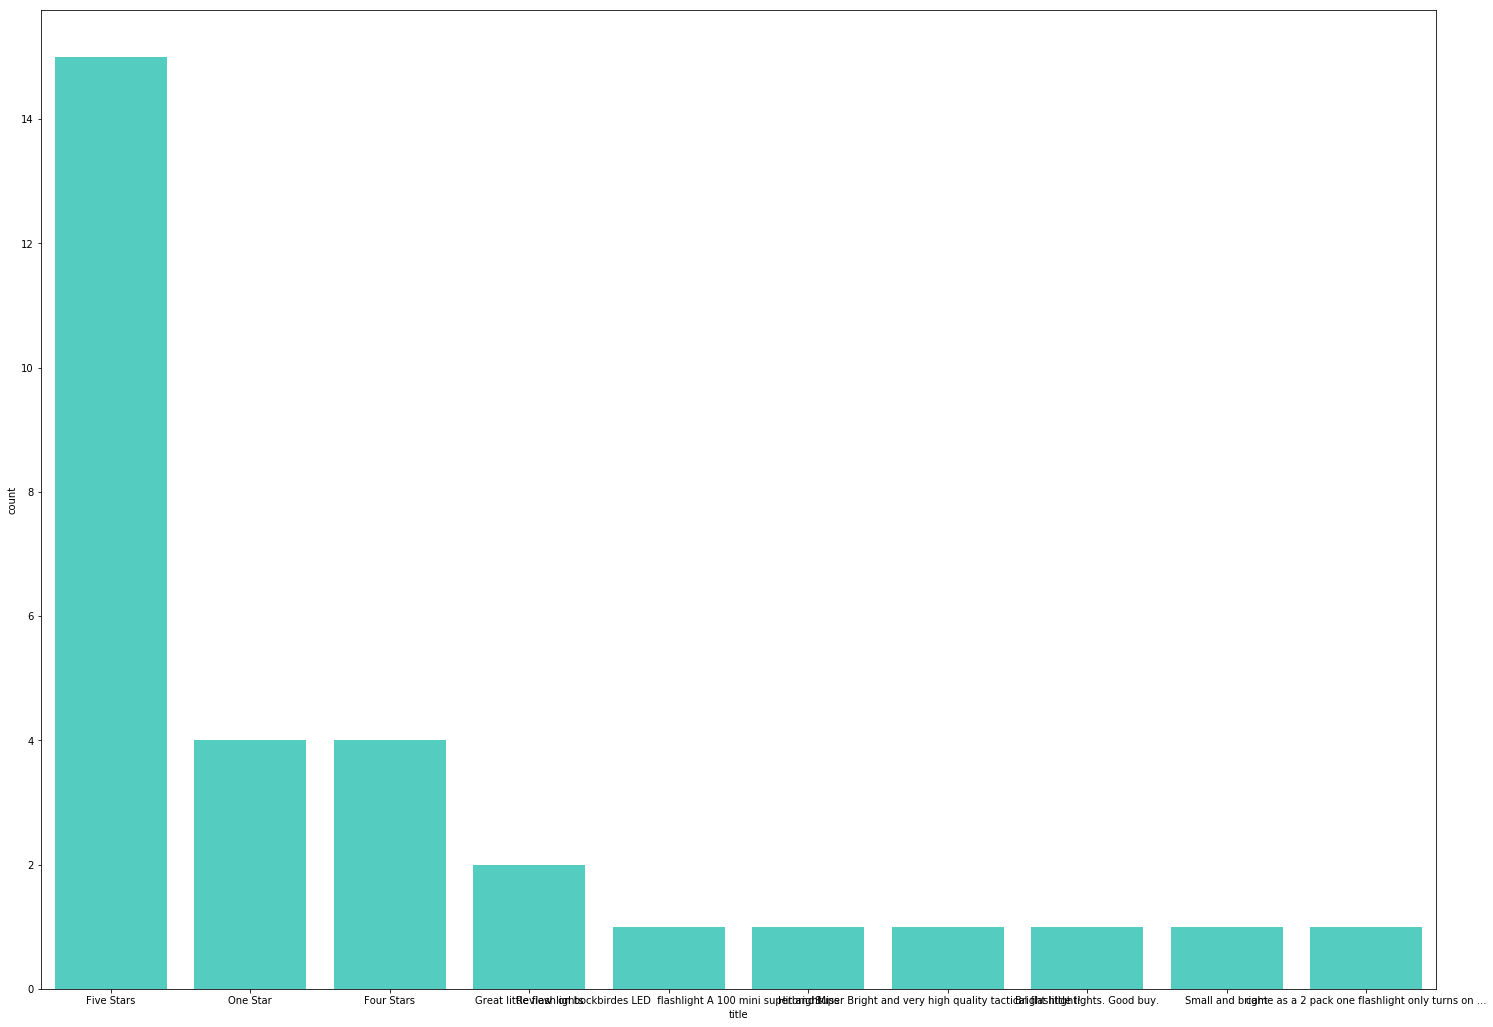

In [31]:
f, ax = plt.subplots(figsize=(25, 18))

sns.barplot(x="title", y="count", data=review_title,
            label="Title Duplicates", color="turquoise",ax = ax)
plt.show()

- User id

In [32]:
len(df.user_id.unique())

381

- User name

In [33]:
len(df.user_name.unique())

346

In [34]:
user_name = pd.DataFrame(df.user_name.value_counts().head(10))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['name', 'count']
user_name

,name,count
0,Amazon Customer,28
1,Eric,3
2,Chris,2
3,Happy,2
4,Matthew,2
5,Dan,2
6,george,2
7,B,2
8,reallylooney,1
9,Gene H.,1


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


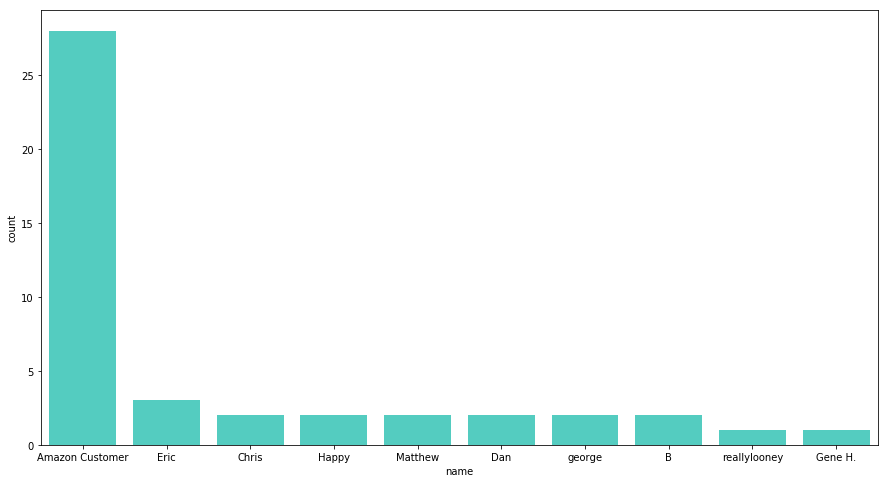

In [35]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="name", y="count", data=user_name,
            label="Title Duplicates", color="turquoise",ax = ax)
plt.show()

- product_pattern/rating

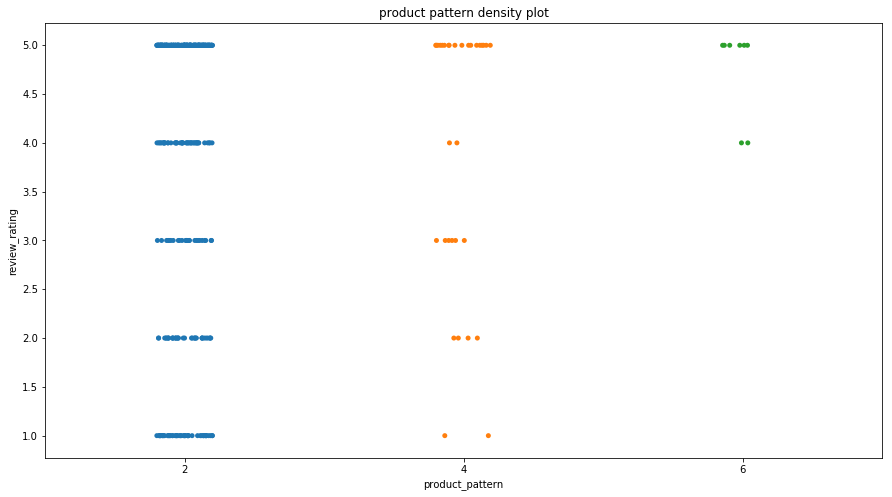

In [36]:
plt.figure(figsize = (15, 8))
plt.title('product pattern density plot')
sns.stripplot(x=df.product_pattern, y=df.review_rating, data=df, jitter=True)
plt.show()

- time/rating

In [37]:
time_rating = pd.DataFrame({'time':df.review_date, 'rating':df.review_rating})

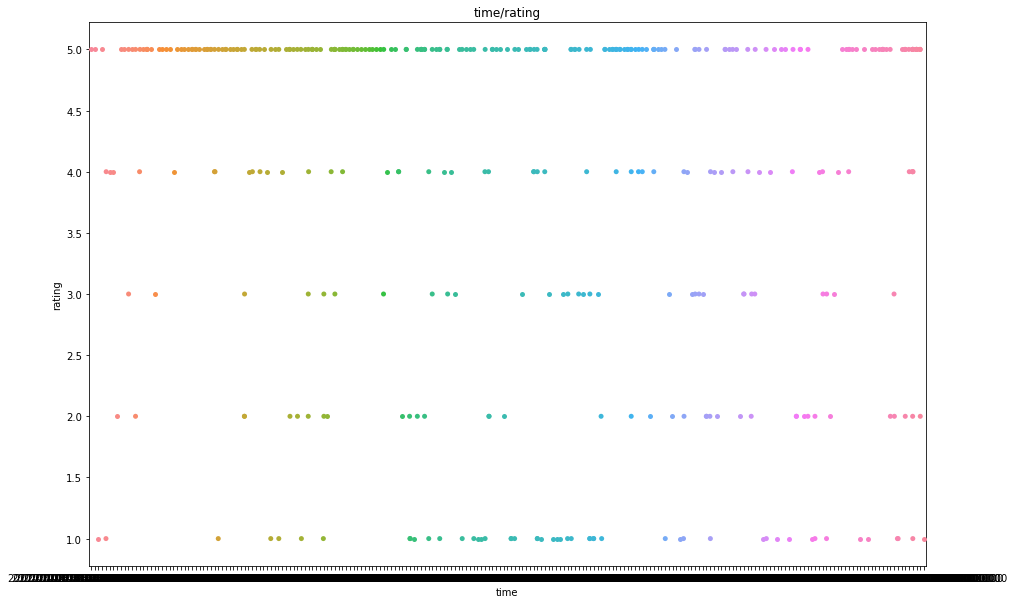

In [38]:
f, ax = plt.subplots(figsize=(15, 10))
plt.title('time/rating')
sns.stripplot(x='time', y='rating', data=time_rating, jitter=True, ax=ax)
plt.show()

### EDA Summary
There are 8 columns in the dataset and 742 observations in total.
- product_pattern: the product format 2 pack, 4 pack and 6 pack
- review_date: after 2017-01-01
- review_id: each review only have 1 id
- review rating: 5 - (473 counts), 4 - (104 counts), 1 - (70 counts), 3 - (49 counts), 2 - (48 counts) 
- review text: Simply check that the duplicates only occurred in short reviews
- review title: 257 customers used stars number to represent the title of the review
- user_id: there are not duplicates
- user_name: 80 customers use 'Amazon Customer' as their user name

product pattern/rating  
time/rating

# NLP and Machine Learning

## 1. What are the top 10 topics customers cared about?
### text observation
    - spacy and nltk
    - Apply Collocations
    - Apply Word2Vec
### Extract 10 topics
    - data preparation
    - Kmean
    - Latent Dirchlet Allocation
    - Latent Semantic Analysis (Latent Semantic Indexing)
    - t-SNE
    

## 2. Predict the rating with customers reviews text accroding to the top 10 topics.

### Estimated model:
- independent variable: review_rating (1-5)
- predictor: review_text
    
### ML algorithms might be used:
- Naive Bayes classifier
- Logistic Regression
- Random Forest
- SVM
- Neural Network

In [39]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import spacy
nlp = spacy.load('en')
from spacy import displacy
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import re

from gensim.models.phrases import Phrases, Phraser
from spacy.pipeline import Pipe
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import stop_words
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,normalize,Normalizer
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score, make_scorer, mean_squared_error
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegressionCV

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

/Users/mani/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. popular 10 topics/features of the product customer cared about
### 1.1. text observation
- Try spacy and nltk

### text observation

In [40]:
#check sample
text = df.review_text[0]

In [41]:
text

'\xa0These Rockbirds LED Flashlights I bought came it a pack of 2 for only $9.99 which is a crazy good deal.  I collect LED flashlights and have about 30 right now but I really like these smaller ones because I can just keep them in my pocket.These are heavy duty and made with aluminum.  The battery compartment has an O ring to keep moisture out.  They are waterproof but not to be submerged in water but they will withstand rain.The beam is adjustable and you can see that in the video I provided to go with this review and I also show all 3 modes of lighting.  All you need to do is slightly tap the on and off switch and it will change modes.Please watch the video to get a better idea of what I am talking about.  Overall it is excellent for the price and you get 2!  I give this 5 stars easily.  I hoped this helped in some way.'

In [42]:
doc = nlp(text)
for index, sent in enumerate(doc.sents):
    print(index, type(sent), sent, '\n')

0 <class 'spacy.tokens.span.Span'>  These Rockbirds LED Flashlights I bought came it a pack of 2 for only $9.99 which is a crazy good deal.   

1 <class 'spacy.tokens.span.Span'> I collect LED flashlights and have about 30 right now 

2 <class 'spacy.tokens.span.Span'> but I really like these smaller ones because I can just keep them in my pocket. 

3 <class 'spacy.tokens.span.Span'> These are heavy duty and made with aluminum.   

4 <class 'spacy.tokens.span.Span'> The battery compartment has an O ring to keep moisture out.   

5 <class 'spacy.tokens.span.Span'> They are waterproof but not to be submerged in water but they will withstand rain. 

6 <class 'spacy.tokens.span.Span'> The beam is adjustable and you can see that in the video I provided to go with this review and I also show all 3 modes of lighting.   

7 <class 'spacy.tokens.span.Span'> All you need to do is slightly tap the on and off switch 

8 <class 'spacy.tokens.span.Span'> and it will change modes. 

9 <class 'spacy.t

In [43]:
for index, sent in enumerate(sent_tokenize(text)):
    print(index, type(sent), sent, '\n')
spacy_sents = list(doc.sents)

0 <class 'str'>  These Rockbirds LED Flashlights I bought came it a pack of 2 for only $9.99 which is a crazy good deal. 

1 <class 'str'> I collect LED flashlights and have about 30 right now but I really like these smaller ones because I can just keep them in my pocket.These are heavy duty and made with aluminum. 

2 <class 'str'> The battery compartment has an O ring to keep moisture out. 

3 <class 'str'> They are waterproof but not to be submerged in water but they will withstand rain.The beam is adjustable and you can see that in the video I provided to go with this review and I also show all 3 modes of lighting. 

4 <class 'str'> All you need to do is slightly tap the on and off switch and it will change modes.Please watch the video to get a better idea of what I am talking about. 

5 <class 'str'> Overall it is excellent for the price and you get 2! 

6 <class 'str'> I give this 5 stars easily. 

7 <class 'str'> I hoped this helped in some way. 



#### It seems spacy perforem better than nltk.

In [44]:
spacy_tokens_dict = {}
for index, sent in enumerate(spacy_sents):
    spacy_tokens_dict['{}'.format(index)] = sent
print(spacy_tokens_dict)

{'0':  These Rockbirds LED Flashlights I bought came it a pack of 2 for only $9.99 which is a crazy good deal.  , '1': I collect LED flashlights and have about 30 right now, '2': but I really like these smaller ones because I can just keep them in my pocket., '3': These are heavy duty and made with aluminum.  , '4': The battery compartment has an O ring to keep moisture out.  , '5': They are waterproof but not to be submerged in water but they will withstand rain., '6': The beam is adjustable and you can see that in the video I provided to go with this review and I also show all 3 modes of lighting.  , '7': All you need to do is slightly tap the on and off switch, '8': and it will change modes., '9': Please watch the video to get a better idea of what I am talking about.  , '10': Overall it is excellent for the price, '11': and you get 2!  , '12': I give this 5 stars easily.  , '13': I hoped this helped in some way.}


In [45]:
nltk_sents = sent_tokenize(text)

In [46]:
WORDS_RE = re.compile(r'\W+')
nltk_tokens_dict = {}
for index, sent in enumerate(nltk_sents):
    nltk_tokens = word_tokenize(sent)
    nltk_tokens_dict['{}'.format(index)] = nltk_tokens
print(nltk_tokens_dict)

{'0': ['These', 'Rockbirds', 'LED', 'Flashlights', 'I', 'bought', 'came', 'it', 'a', 'pack', 'of', '2', 'for', 'only', '$', '9.99', 'which', 'is', 'a', 'crazy', 'good', 'deal', '.'], '1': ['I', 'collect', 'LED', 'flashlights', 'and', 'have', 'about', '30', 'right', 'now', 'but', 'I', 'really', 'like', 'these', 'smaller', 'ones', 'because', 'I', 'can', 'just', 'keep', 'them', 'in', 'my', 'pocket.These', 'are', 'heavy', 'duty', 'and', 'made', 'with', 'aluminum', '.'], '2': ['The', 'battery', 'compartment', 'has', 'an', 'O', 'ring', 'to', 'keep', 'moisture', 'out', '.'], '3': ['They', 'are', 'waterproof', 'but', 'not', 'to', 'be', 'submerged', 'in', 'water', 'but', 'they', 'will', 'withstand', 'rain.The', 'beam', 'is', 'adjustable', 'and', 'you', 'can', 'see', 'that', 'in', 'the', 'video', 'I', 'provided', 'to', 'go', 'with', 'this', 'review', 'and', 'I', 'also', 'show', 'all', '3', 'modes', 'of', 'lighting', '.'], '4': ['All', 'you', 'need', 'to', 'do', 'is', 'slightly', 'tap', 'the', 'o

#### It seems nltk perform better

In [47]:
[(t, t.pos_, t.tag_, t.lemma_, t.dep_, t.head) for t in spacy_sents[0]]

[( , 'SPACE', '', '  ', '', These),
 (These, 'DET', 'DT', 'these', 'det', Flashlights),
 (Rockbirds, 'PROPN', 'NNPS', 'rockbirds', 'compound', Flashlights),
 (LED, 'VERB', 'VBD', 'lead', 'compound', Flashlights),
 (Flashlights, 'NOUN', 'NNS', 'flashlight', 'nsubj', came),
 (I, 'PRON', 'PRP', '-PRON-', 'nsubj', bought),
 (bought, 'VERB', 'VBD', 'buy', 'relcl', Flashlights),
 (came, 'VERB', 'VBD', 'come', 'ROOT', came),
 (it, 'PRON', 'PRP', '-PRON-', 'nsubj', came),
 (a, 'DET', 'DT', 'a', 'det', pack),
 (pack, 'NOUN', 'NN', 'pack', 'npadvmod', came),
 (of, 'ADP', 'IN', 'of', 'prep', pack),
 (2, 'NUM', 'CD', '2', 'pobj', of),
 (for, 'ADP', 'IN', 'for', 'prep', came),
 (only, 'ADV', 'RB', 'only', 'advmod', 9.99),
 ($, 'SYM', '$', '$', 'quantmod', 9.99),
 (9.99, 'NUM', 'CD', '9.99', 'pobj', for),
 (which, 'ADJ', 'WDT', 'which', 'nsubj', is),
 (is, 'VERB', 'VBZ', 'be', 'relcl', 9.99),
 (a, 'DET', 'DT', 'a', 'det', deal),
 (crazy, 'ADJ', 'JJ', 'crazy', 'amod', deal),
 (good, 'ADJ', 'JJ', 'goo

In [48]:
for i in range(len(spacy_sents)):
    displacy.render(spacy_sents[i].as_doc(), style='dep', jupyter=True, options={'distance': 120})

In [49]:
text = df.review_text[1]

In [50]:
doc = nlp(text)
spacy_sents = list(doc.sents)

In [51]:
[(t, t.pos_, t.tag_, t.lemma_, t.dep_, t.head) for t in spacy_sents[0]]

[(Given, 'VERB', 'VBN', 'give', 'prep', are),
 (my, 'ADJ', 'PRP$', '-PRON-', 'poss', many),
 (many, 'ADJ', 'JJ', 'many', 'pobj', Given),
 (prior, 'ADJ', 'JJ', 'prior', 'amod', experiences),
 (,, 'PUNCT', ',', ',', 'punct', experiences),
 (poor, 'ADJ', 'JJ', 'poor', 'amod', experiences),
 (experiences, 'NOUN', 'NNS', 'experience', 'pobj', Given),
 (with, 'ADP', 'IN', 'with', 'prep', experiences),
 (several, 'ADJ', 'JJ', 'several', 'pobj', with),
 (of, 'ADP', 'IN', 'of', 'prep', several),
 (the, 'DET', 'DT', 'the', 'det', LED),
 (low, 'ADJ', 'JJ', 'low', 'amod', price),
 (-, 'PUNCT', 'HYPH', '-', 'punct', price),
 (price, 'NOUN', 'NN', 'price', 'nmod', knockoff),
 (/, 'SYM', 'SYM', '/', 'punct', knockoff),
 (knockoff, 'NOUN', 'NN', 'knockoff', 'compound', LED),
 (CREE, 'PROPN', 'NNP', 'cree', 'compound', type),
 (type, 'NOUN', 'NN', 'type', 'compound', LED),
 (LED, 'VERB', 'VBN', 'lead', 'pobj', of),
 (,, 'PUNCT', ',', ',', 'punct', Given),
 (zoomable, 'ADJ', 'JJ', 'zoomable', 'amod', st

In [52]:
for i in range(len(spacy_sents)):
    displacy.render(spacy_sents[i].as_doc(), style='dep', jupyter=True, options={'distance': 120})

### summary:
#### Both Spacy and nltk Looks good. But it seems hard to find topics customers cared about around those reviews based on pos/tag/dep/head...

In [53]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name,new_layer
0,2,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy,high
1,2,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB,high
2,2,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky,high
3,2,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins,high
4,4,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911,high


### 1.2 Try Collocations

In [54]:
text = df.review_text

In [55]:
%%time

## apply collocation function to review_text
token_text = []
for doc in nlp.pipe(text):
    for sent in doc.sents:
        token_text.append([t.lower_ for t in sent if not t.is_punct])

CPU times: user 6.82 s, sys: 1.57 s, total: 8.39 s
Wall time: 5.92 s


In [56]:
## set up common_terms
common_terms = list(stop_words.ENGLISH_STOP_WORDS) + ["'m", "'re", "'ll", "'s", "'ve", 
                                                      "'d", 'ca', 'is', 'on','in','at',
                                                     'as', 'the', 'are', 'and', 'does', 
                                                      "of", 'do', 'does', "'t"]

In [57]:
phrases = Phrases(token_text, common_terms=common_terms)
colloc = Phraser(phrases)
colloc_text = colloc[token_text]
tri_phrases = Phrases(colloc_text, common_terms=common_terms)
tri_colloc = Phraser(tri_phrases)
tri_colloc_text = tri_colloc[colloc_text]

### 1.3 Try Word2Vec

In [58]:
%%time

model = Word2Vec(tri_colloc_text, size=100, workers=8)

CPU times: user 887 ms, sys: 14 ms, total: 901 ms
Wall time: 878 ms


In [59]:
model.wv.most_similar('light')

[('a', 0.9998793005943298),
 ('to', 0.9998710751533508),
 ('i', 0.9998672008514404),
 ('it', 0.9998664855957031),
 ('but', 0.9998624920845032),
 ('for', 0.9998613595962524),
 ('as', 0.9998607039451599),
 ('the', 0.9998559951782227),
 ('and', 0.9998536109924316),
 ('only', 0.9998519420623779)]

In [60]:
model.wv.most_similar('bright')

[('to', 0.9998112916946411),
 ('of', 0.9997986555099487),
 ('and', 0.9997909665107727),
 ('in', 0.9997819066047668),
 ('is', 0.9997807741165161),
 ('i', 0.9997782111167908),
 ('it', 0.99977707862854),
 ('quality', 0.9997762441635132),
 ('are', 0.9997738003730774),
 ('you', 0.9997732043266296)]

In [61]:
model.wv.most_similar('good')

[('a', 0.9998832941055298),
 ('for', 0.9998729825019836),
 ('i', 0.9998701810836792),
 ('they', 0.9998583793640137),
 ('in', 0.9998557567596436),
 ('the', 0.9998549818992615),
 ('very', 0.9998547434806824),
 ('it', 0.9998542070388794),
 ('or', 0.9998520016670227),
 ('and', 0.9998482465744019)]

In [62]:
model.wv.most_similar('durable')

[('flashlights', 0.9995061755180359),
 ('work', 0.9994922280311584),
 ('a', 0.9994887113571167),
 ('out', 0.9994800090789795),
 ('i', 0.9994708299636841),
 ('in', 0.999470055103302),
 ('beam', 0.9994699358940125),
 ('to', 0.9994679093360901),
 ('worked', 0.9994673728942871),
 ('very', 0.9994635581970215)]

In [63]:
model.wv.most_similar('cheap')

[('mode', 0.9995383620262146),
 ('as', 0.9995142221450806),
 ('in', 0.9994975328445435),
 ('they', 0.9994943737983704),
 ("n't", 0.9994916319847107),
 ('flashlight', 0.9994906783103943),
 ('well', 0.9994885325431824),
 ('i', 0.9994867444038391),
 ('and', 0.9994863271713257),
 ('for', 0.9994852542877197)]

In [64]:
vocab_set = set()

In [65]:
for sent in tri_colloc_text:
    vocab_set.update(sent)

### 1.4 Detect the top 10 topics
#### Data preparation

In [66]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name,new_layer
0,2,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy,high
1,2,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB,high
2,2,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky,high
3,2,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins,high
4,4,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911,high


In [67]:
train_set = df[['review_rating', 'review_text', 'new_layer']]

In [68]:
train_set = train_set.groupby('new_layer')

In [69]:
train_set.describe()

review_rating                                             
                  count      mean       std  min  25%  50%  75%  max
new_layer                                                           
high              262.0  4.805344  0.396694  4.0  5.0  5.0  5.0  5.0
low                88.0  1.431818  0.498168  1.0  1.0  1.0  2.0  2.0
neutral            31.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0

In [70]:
data = train_set.apply(lambda x: x.sample(262, replace = True))
data['new_layer'] =  data['review_rating'].apply(new_y)
data.sample(10)

review_rating  \
new_layer                      
neutral   262              3   
low       631              2   
high      2                5   
          656              5   
          190              5   
neutral   123              3   
          720              3   
low       540              2   
          271              2   
          54               2   

                                                     review_text new_layer  
new_layer                                                                   
neutral   262  VERY small in size (like 3 inches at most). Go...   neutral  
low       631  After a long time of carrying these disappoint...       low  
high      2    Great deal for a pair of mini flashlights.  Ve...      high  
          656  These flashlights are so valuable and they are...      high  
          190  I purchased the LED Flashlight by Rockbirds be...      high  
neutral   123  Not bad.  One of them doesn't turn on anymore,...   neutral  
          720  i gave it 3 stars because only one of the flas...   neutral  
low       540  The batteries in BOTH flashlights were no good...       low  
          271  Used around 10 times, already stopped working,...       low  
          54   I use the flashlight with a 14500 battery. The...       low

#### Calculate Term Frequencies
In this step, I will calculate the term frequency and tf-idf weighted term frequency.

Steps Outline:
1. turn all word into snowball stemmer
2. transform review text into tf-idf or count
2. the word/term in most 90% of documents
3. the word/term in at least 10 documents
4. adjust stopwords

In [71]:
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data, idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if idf:
        """Convert a collection of raw documents to a matrix of TF-IDF features."""
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        """Convert a collection of text documents to a matrix of token counts"""
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    d = m.fit_transform(data)
    return m, d

In [72]:
tf_m, tf_d = get_tf(data['review_text'], idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(data['review_text'], idf=True, max_df=0.90, min_df=10)

### 1.5 Kmean

In [73]:
n_topics = 10

In [74]:
def get_kmeans(data, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data)
    
    m = KMeans(n_clusters=k, init='random', n_jobs=1, max_iter=1000).fit(data)
    d = m.predict(data)
    return m, d        

In [75]:
kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics, scale=False)

### 1.5 Latent Dirchlet Allocation

In [76]:
n_topics = 10

In [77]:
def get_lda(data, topics):
    m = LatentDirichletAllocation(n_components=topics, n_jobs=-1, learning_method='online').fit(data)
    d = m.transform(data)
    return m, d

In [78]:
lda_m, lda_d = get_lda(tf_d, n_topics)

In [79]:
def print_topic_words(components, vocab, num_topics=10, num_of_word_per_topic=10):
    topic_words = []
    vocab_array = np.array(vocab)

    for topic in components:
        word_idx = np.argsort(topic)[::-1][:num_of_word_per_topic]
        topic_words.append((vocab_array[word_idx]).tolist())
        
    for topic, words in list(zip(['Topic_{}'.format(i+1) for i in range(num_topics)], topic_words))[:10]:
        print(topic, words)

In [80]:
print("Top 10 stemmed words per topic in LDA model\n")
print_topic_words(lda_m.components_, tf_m.get_feature_names())

Top 10 stemmed words per topic in LDA model

Topic_1 ['light', 'mode', 'flashlight', 'bright', 'batteri', 'work', 'good', 'use', 'just', 'switch']
Topic_2 ['light', 't', 'flash', 'work', 'use', 'good', 'batteri', 'don', 'just', 'make']
Topic_3 ['cap', 'ok', 'flashlight', 'batteri', 'design', 'light', 'bought', 'lumen', 'price', 'got']
Topic_4 ['work', 'flashlight', 'use', 'onli', 'batteri', "don't", 'like', 'pocket', 'bright', 'product']
Topic_5 ['turn', 'high', 'strobe', 'button', 'mode', 'expect', 'press', 'veri', 'flashlight', 'low']
Topic_6 ['hand', 'great', 'time', 'use', 'say', 'realli', 'want', 'ani', 'everi', 'veri']
Topic_7 ['veri', 'good', 'like', 'clip', 'product', 'flashlight', 'work', 'love', 'bright', 'price']
Topic_8 ['flashlight', 'bright', 'veri', 'easi', 'push', 'case', 'button', 'batteri', 'come', 'littl']
Topic_9 ['small', 'light', 'better', 'good', 'just', 'order', 'bad', 'whi', 'flashlight', 'bright']
Topic_10 ['light', 'bright', 'time', 'batteri', 'valu', 'turn',

In [81]:
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()

In [82]:
print("Top 10 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)

Top 10 stemmed words per cluster in Kmeans model

Cluster #0:
flash, inch, tho, backpack, like, kid, purs, work, size, small, start, switch, good, twice, veri
Cluster #1:
someth, bigger, great, els, look, low, beam, flashlight, high, light, pictur, flasher, kid, tini, star
Cluster #2:
price, site, good, bright, flashlight, buy, thought, outdoor, fish, hunt, activ, receiv, materi, fact, belt
Cluster #3:
veri, flashlight, bright, great, pocket, use, light, littl, love, small, work, carri, easi, like, size
Cluster #4:
lumen, adjust, ok, batteri, hand, flimsi, light, realli, cap, fine, aa, say, ani, best, bad
Cluster #5:
work, t, light, did, good, star, becaus, batteri, tail, reli, cap, just, know, box, half
Cluster #6:
turn, mode, strobe, light, time, button, chang, cycl, high, low, grip, slightest, bright, expect, drop
Cluster #7:
light, don't, batteri, super, good, cheap, use, focus, just, bad, feel, make, sure, can't, like
Cluster #8:
small, descript, better, hope, brighter, advertis, 

### 1.6 Latent Semantic Analysis (Latent Semantic Indexing)

In [83]:
def get_svd(data, components):
    svd = TruncatedSVD(n_components=components).fit(data)
    o = pd.DataFrame(svd.transform(data), columns=range(0,components))
    return svd,o

In [84]:
svd_v, svd_m = get_svd(tfidf_d, 50)

In [85]:
print("Top 10 stemmed words per topic in SVD model\n")
print_topic_words(svd_v.components_, tf_m.get_feature_names())

Top 10 stemmed words per topic in SVD model

Topic_1 ['light', 'flashlight', 'work', 'bright', 'batteri', 'veri', 'use', 'good', 'great', 'turn']
Topic_2 ['turn', 'mode', 'strobe', 'time', 'chang', 'slightest', 'grip', 'drop', 'button', 'cycl']
Topic_3 ['work', 'did', 't', 'switch', 'light', 'cap', 'tail', 'reli', 'star', 'becaus']
Topic_4 ['ok', 'button', 'cap', 'turn', 'price', 'flashlight', 'batteri', 'fine', 'mode', 'product']
Topic_5 ['light', 'price', 'good', 'receiv', 'bright', 't', 'site', 'tail', 'expect', 'reli']
Topic_6 ['veri', 'good', 'inch', 'tho', 'backpack', 'small', 'work', 'purs', 'turn', 'kid']
Topic_7 ['time', 'flashlight', 'price', 'site', 'receiv', 'bright', 'great', 'drop', 'slightest', 'grip']
Topic_8 ['time', 'cap', 'ok', 'light', 'slightest', 'grip', 'proper', 'design', 'hurrican', 'bit']
Topic_9 ['flimsi', 'great', 'realli', 'hand', 'bad', 'cheapli', 'lens', 'adjust', 'pay', 'work']
Topic_10 ['batteri', 'drop', 'good', 'grip', 'slightest', 'chang', 'time', 'l

### 1.7 t-SNE

In [86]:
def get_tsne(data, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data), columns=range(0,components))
    return tsne,o

In [87]:
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

In [88]:
def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

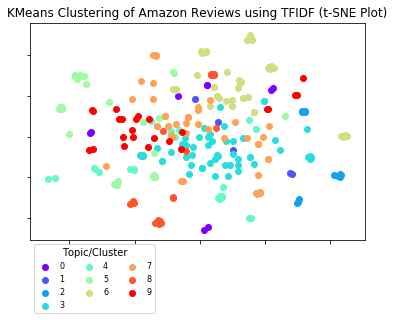

In [89]:
%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 262, 'KMeans Clustering of Amazon Reviews using TFIDF (t-SNE Plot)')

In [90]:
lda_c = lda_d.argmax(axis=1)

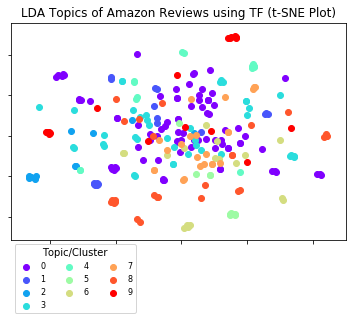

In [91]:
%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], lda_c, 262, 'LDA Topics of Amazon Reviews using TF (t-SNE Plot)')

### Summary:
In this part, I got 10 topics with trying different methods(k-mean, lda, svd) and draw clustering map to visulize the plot.

## 2. Predict review rating based on review text according to top 10 topics

### 2.1 data preparation

In this step I will used the tfidf as the X variable and new_layer(low, neural, high) as the Y variable.  
I will select 80/20 as the training set and test set ratio and the sample will be selected randomly.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_d, data.new_layer, test_size=0.2, shuffle = True, random_state= 1)

### Machine Learning Model fitting and tuning

#### Calculate the accuracy

- logistic Regression
- Random Forest
- SVM
- Multinomial Naive Bayes
- NN

In [93]:
def calculate_acc(X, y):
    results = {
        'Logistic Regression': [],
        'Random Forest':[],
        'SVM': [],
        'Multinomial Naive Bayes': [],
        'Neural Network':[],
        'Combined 5': []
    }
    lm = LogisticRegression()
    rf = RandomForestClassifier(max_depth=2, random_state=0)
    svm = SVC()
    nb = MultinomialNB()
    nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 3), random_state=1)
    vc = VotingClassifier([('lm', lm), ('rf', rf),('svm', svm), ('nb', nb), ('nn',nn)])
    
    for c in new_layer:
        y_adj = np.array(y==c)
        results['Logistic Regression'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['Random Forest'].append((cross_val_score(rf, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['SVM'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['Multinomial Naive Bayes'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['Neural Network'].append((cross_val_score(nn, X, y_adj, cv=10, scoring='accuracy').mean(),c))
        results['Combined 5'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

#### Test the calculate_cv function

In [94]:
%%time
acc_scores = calculate_acc(X_test, y_test)

CPU times: user 5.19 s, sys: 94.3 ms, total: 5.28 s
Wall time: 2.98 s


In [96]:
print("Model accuracy predictionswithout training and tuning.\n ")
for m,s in acc_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m, R=ss[1], S=ss[0]))
    print()

Model accuracy predictionswithout training and tuning.
 
Logistic Regression model (low rating): 78.5%
Logistic Regression model (neutral rating): 85.3%
Logistic Regression model (high rating): 83.0%

Random Forest model (low rating): 68.4%
Random Forest model (neutral rating): 70.2%
Random Forest model (high rating): 68.3%

SVM model (low rating): 67.1%
SVM model (neutral rating): 65.9%
SVM model (high rating): 67.1%

Multinomial Naive Bayes model (low rating): 77.7%
Multinomial Naive Bayes model (neutral rating): 82.2%
Multinomial Naive Bayes model (high rating): 84.8%

Neural Network model (low rating): 67.1%
Neural Network model (neutral rating): 65.9%
Neural Network model (high rating): 89.1%

Combined 5 model (low rating): 67.7%
Combined 5 model (neutral rating): 70.2%
Combined 5 model (high rating): 82.9%



In [97]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [103]:
def test_review(model,text):
    test_str = [text]
    test_new = tfidf_m.transform(test_str)
    predict = model.predict(test_new)
    probability = model.predict_proba(test_new)[0][1]
    print('The result is {}'.format(predict[0])+ ' with probability:{}'.format(probability))
    return None

### 2.2 Logistic Regression -  Train + Predict + Tune

In [98]:
%%time
#Train
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

CPU times: user 7.07 ms, sys: 1.86 ms, total: 8.93 ms
Wall time: 7.57 ms


Confusion matrix, without normalization
[[49  2  1]
 [ 3 48  1]
 [ 0  6 48]]


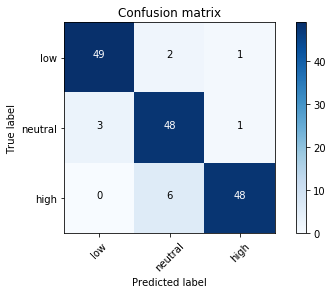

In [99]:
#predict
lr_prediction= lr.predict(X_test)
xtab = confusion_matrix(y_test, lr_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [100]:
lr_acc = accuracy_score(y_test, lr_prediction)
print('Accuracy:',lr_acc)

Accuracy: 0.917721518987


In [102]:
lr_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(lr, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    lr_acc_li.append([c, scores])
lr_acc_li

[['low', 0.90931899641577052],
 ['neutral', 0.95545314900153611],
 ['high', 0.91564260112647222]]

In [104]:
#Test 1
print('star:',df.review_rating[100],'text:',df.review_text[100])
test_review(lr,"Unable to open battery cap of flashlights. Contacted supplier, still no response. Worst Product & Service.")

#Test 2
print('star:',df.review_rating[25],'text:', df.review_text[25])
test_review(lr, 'This is one of the must haves for each and every family. We used it for night time outdoor exploration, under closet repair and kids love it for haunted house.')

star: 1 text: Unable to open battery cap of flashlights. Contacted supplier, still no response. Worst Product & Service.
The result is low with probability:0.7523026092331065
star: 5 text: This is one of the must haves for each and every family. We used it for night time outdoor exploration, under closet repair and kids love it for haunted house.
The result is high with probability:0.1760195371790839


In [105]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [107]:
#tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                  'penalty':['l1','l2'], }

CV_lr = GridSearchCV(lr, param_grid)
CV_lr.fit(X_train, y_train)
print (CV_lr.best_params_)


{'C': 1000, 'penalty': 'l2'}


Confusion matrix, without normalization
[[47  2  3]
 [ 1 51  0]
 [ 0  0 54]]


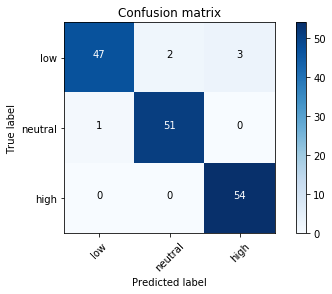

In [110]:
best_lr = CV_lr.best_estimator_
best_lr = best_lr.fit(X_train, y_train)
best_lr_prediction = best_lr.predict(X_test)
xtab = confusion_matrix(y_test, best_lr_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [111]:
best_lr_acc = accuracy_score(y_test, best_lr_prediction)
print('Accuracy:',best_lr_acc)

Accuracy: 0.962025316456


In [112]:
best_lr_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(best_lr, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    best_lr_acc_li.append([c, scores])
best_lr_acc_li

[['low', 0.958653353814644],
 ['neutral', 0.9872759856630825],
 ['high', 0.97767537122375825]]

In [114]:
dif = best_lr_acc - lr_acc
low_dif = best_lr_acc_li[0][1] - lr_acc_li[0][1]
neutral_dif = best_lr_acc_li[1][1] - lr_acc_li[1][1]
high_dif = best_lr_acc_li[2][1] - lr_acc_li[2][1]
print(dif,low_dif, neutral_dif, high_dif)

0.0443037974684 0.0493343573989 0.0318228366615 0.0620327700973


### Summary:
Accuracy After Tuning:
- Total: 96.20%
- low: 95.86%
- neutral:98.72%
- high: 97.76%

Accuracy Difference After Tuning: 
- Total: +4.43%
- Low: +4.93%
- Neutral: +3.18%
- High: +6.20%

### 2.3 Random Forest

In [124]:
%%time
#Train
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf = rf.fit(X_train, y_train)

CPU times: user 20.4 ms, sys: 2.39 ms, total: 22.8 ms
Wall time: 20.7 ms


Confusion matrix, without normalization
[[35 12  5]
 [ 6 46  0]
 [10 32 12]]


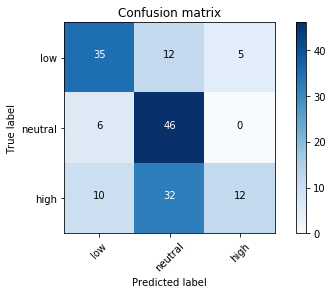

In [125]:
#predict
rf_prediction= rf.predict(X_test)
xtab = confusion_matrix(y_test, rf_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [126]:
rf_acc = accuracy_score(y_test, rf_prediction)
print('Accuracy:',rf_acc)

Accuracy: 0.588607594937


In [127]:
rf_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(rf, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    rf_acc_li.append([c, scores])
rf_acc_li

[['low', 0.692626728110599],
 ['neutral', 0.68476702508960574],
 ['high', 0.69743983614951355]]

In [128]:
#Test 1
print('star:',df.review_rating[100],'text:',df.review_text[100])
test_review(rf,"Unable to open battery cap of flashlights. Contacted supplier, still no response. Worst Product & Service.")

#Test 2
print('star:',df.review_rating[25],'text:', df.review_text[25])
test_review(rf, 'This is one of the must haves for each and every family. We used it for night time outdoor exploration, under closet repair and kids love it for haunted house.')

star: 1 text: Unable to open battery cap of flashlights. Contacted supplier, still no response. Worst Product & Service.
The result is low with probability:0.35221262372775897
star: 5 text: This is one of the must haves for each and every family. We used it for night time outdoor exploration, under closet repair and kids love it for haunted house.
The result is neutral with probability:0.28184481684762097


In [129]:
#tune
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)
print (CV_rf.best_params_)

{'max_features': 'log2', 'n_estimators': 700}


Confusion matrix, without normalization
[[46  4  2]
 [ 2 50  0]
 [14  0 40]]


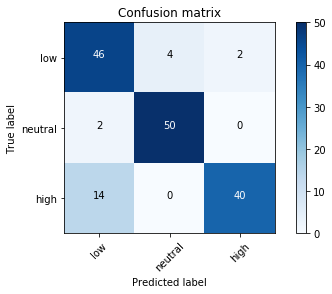

In [130]:
rf_best = CV_rf.best_estimator_
rf_best = rf_best.fit(X_train, y_train)
rf_best_prediction = rf_best.predict(X_test)
xtab = confusion_matrix(y_test, rf_best_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [131]:
rf_best_acc = accuracy_score(y_test, rf_best_prediction)
print('Accuracy:',rf_best_acc)

Accuracy: 0.860759493671


In [136]:
rf_best_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(rf_best, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    rf_best_acc_li.append([c, scores])
rf_best_acc_li

[['low', 0.66559139784946231],
 ['neutral', 0.66881720430107527],
 ['high', 0.66720430107526885]]

In [137]:
dif = rf_best_acc - rf_acc
low_dif = rf_best_acc_li[0][1] - rf_acc_li[0][1]
neutral_dif = rf_best_acc_li[1][1] - rf_acc_li[1][1]
high_dif = rf_best_acc_li[2][1] - rf_acc_li[2][1]
print(dif, low_dif, neutral_dif, high_dif)

0.272151898734 -0.0270353302611 -0.0159498207885 -0.0302355350742


### Summary:
Accuracy After Tuning:
- Total: 86%
- low: 66.55%
- neutral: 66.88%
- high: 66.72%

Accuracy Difference After Tuning: 
- Total: +27.21%
- Low: -2.70%
- Neutral: -1.59%
- High: -0.04%

### 2.4 SVM - Train + Predict + Tune

In [138]:
#train
svm = SVC()
svm = svm.fit(X_train, y_train)

Confusion matrix, without normalization
[[49  3  0]
 [ 3 49  0]
 [24 30  0]]


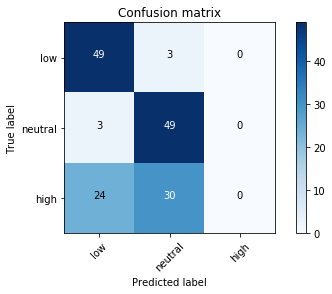

In [139]:
#predict
svm_prediction= svm.predict(X_test)
xtab = confusion_matrix(y_test, svm_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [140]:
svm_acc = accuracy_score(y_test, svm_prediction)
print('Accuracy:',svm_acc)

Accuracy: 0.620253164557


In [141]:
svm_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(svm, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    svm_acc_li.append([c, scores])
svm_acc_li

[['low', 0.66559139784946231],
 ['neutral', 0.66881720430107527],
 ['high', 0.66559139784946231]]

In [142]:
svm.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [143]:
#Tune
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
CV_svm = GridSearchCV(svm,param_grid,refit = True, verbose=2)
CV_svm.fit(X_train, y_train)
print (CV_svm.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    5.8s finished


Confusion matrix, without normalization
[[51  1  0]
 [ 2 50  0]
 [ 0  0 54]]


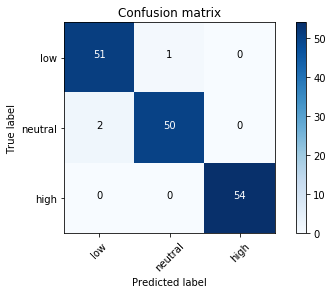

In [144]:
svm_best = CV_svm.best_estimator_
svm_best = svm_best.fit(X_train, y_train)
svm_best_prediction = svm_best.predict(X_test)
xtab = confusion_matrix(y_test, svm_best_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [145]:
svm_best_acc = accuracy_score(y_test, svm_best_prediction)
print('Accuracy:',svm_best_acc)

Accuracy: 0.981012658228


In [146]:
svm_best_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(svm_best, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    svm_best_acc_li.append([c, scores])
svm_best_acc_li

[['low', 0.96658986175115191],
 ['neutral', 0.99682539682539684],
 ['high', 0.9761136712749614]]

In [147]:
dif = svm_best_acc - svm_acc
low_dif = svm_best_acc_li[0][1] - svm_acc_li[0][1]
neutral_dif = svm_best_acc_li[1][1] - svm_acc_li[1][1]
high_dif = svm_best_acc_li[2][1] - svm_acc_li[2][1]
print(dif, low_dif, neutral_dif, high_dif)

0.360759493671 0.300998463902 0.328008192524 0.310522273425


### Summary:
Accuracy After Tuning:
- Total: 98.10%
- low: 96.65%
- neutral: 99.68%
- high: 97.61%

Accuracy Difference After Tuning: 
- Total: +36.07%
- Low: +30.09%
- Neutral: +32.80%
- High: +31.05%

### 2.5 Multinomial Naive Bayes - Train + Predict

In [148]:
#train
nb = MultinomialNB()
nb = nb.fit(X_train, y_train)

Confusion matrix, without normalization
[[50  2  0]
 [ 2 47  3]
 [ 0 12 42]]


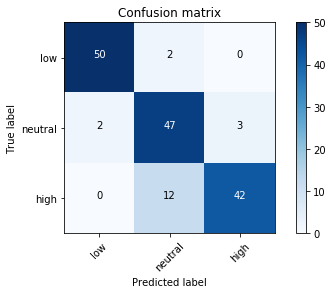

In [149]:
nb_prediction = nb.predict(X_test)
xtab = confusion_matrix(y_test, nb_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [150]:
nb_acc = accuracy_score(y_test, nb_prediction)
print('Accuracy:',nb_acc)

Accuracy: 0.879746835443


In [151]:
print('star:',df.review_rating[100],'text:',df.review_text[100])

test_review(nb,"Unable to open battery cap of flashlights. Contacted supplier, still no response. Worst Product & Service.")

print('star:',df.review_rating[25],'text:', df.review_text[25])

test_review(nb, 'This is one of the must haves for each and every family. We used it for night time outdoor exploration, under closet repair and kids love it for haunted house.')

star: 1 text: Unable to open battery cap of flashlights. Contacted supplier, still no response. Worst Product & Service.
The result is low with probability:0.842438474166473
star: 5 text: This is one of the must haves for each and every family. We used it for night time outdoor exploration, under closet repair and kids love it for haunted house.
The result is high with probability:0.07692481412745719


### Summary:
There is not parameter to tune, so I can not imporve the accuracy of Naive Bayes

### 2.6 Neural Network - Train + Predict + Tune

In [152]:
#Train
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 3), random_state=1)
nn = nn.fit(X_train, y_train)

Confusion matrix, without normalization
[[ 0 52  0]
 [ 0 52  0]
 [ 0 54  0]]


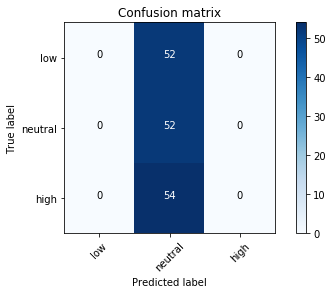

In [153]:
#Predict
nn_prediction = nn.predict(X_test)
xtab = confusion_matrix(y_test, nn_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [154]:
nn_acc = accuracy_score(y_test, nn_prediction)
print('Accuracy:',nn_acc)

Accuracy: 0.329113924051


In [157]:
nn_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(nn, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    nn_acc_li.append([c, scores])
nn_acc_li

[['low', 0.66559139784946231],
 ['neutral', 0.66881720430107527],
 ['high', 0.9761136712749614]]

In [158]:
nn.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [160]:
#Tune
param_grid = {'hidden_layer_sizes':[(5, 3),(10,3), (20,3), (5,6),(10, 6), (16, 6), (20,6)], 
             'learning_rate_init': [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
CV_nn = GridSearchCV(nn, param_grid,refit = True)
CV_nn.fit(X_train, y_train)
print (CV_nn.best_params_)

{'hidden_layer_sizes': (10, 6), 'learning_rate_init': 0.0005}


Confusion matrix, without normalization
[[48  2  2]
 [ 1 51  0]
 [ 0  0 54]]


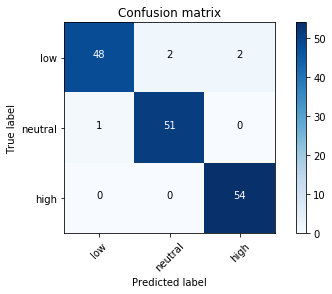

In [161]:
nn_best = CV_nn.best_estimator_
nn_best = nn_best.fit(X_train, y_train)
nn_best_prediction = nn_best.predict(X_test)
xtab = confusion_matrix(y_test, nn_best_prediction)
plot_confusion_matrix(xtab, classes=new_layer)

In [162]:
nn_best_acc = accuracy_score(y_test, nn_best_prediction)
print('Accuracy:',nn_best_acc)

Accuracy: 0.96835443038


In [163]:
nn_best_acc_li = []
for c in new_layer:
    y_adj = np.array(y_train==c)
    scores = (cross_val_score(nn_best, X_train, y_adj, cv=10, scoring='accuracy')).mean()
    nn_best_acc_li.append([c, scores])
nn_best_acc_li

[['low', 0.96021505376344085],
 ['neutral', 0.98092677931387606],
 ['high', 0.97293906810035824]]

In [164]:
dif = nn_best_acc - nn_acc
low_dif = nn_best_acc_li[0][1] - nn_acc_li[0][1]
neutral_dif = nn_best_acc_li[1][1] - nn_acc_li[1][1]
high_dif = nn_best_acc_li[2][1] - nn_acc_li[2][1]
print(dif, low_dif, neutral_dif, high_dif)

0.639240506329 0.294623655914 0.312109575013 -0.0031746031746


### Summary:
Accuracy After Tuning:
- Total:98.10%
- low: 96.66%
- neutral:98.56%
- high: 97.60%

Accuracy Difference After Tuning: 
- Total: +63.92%
- Low: +29.46%
- Neutral: +31.21%
- High: -0.31%

## Machine Learning Part Summary:
The Accuracy of each model:
- Logistic Regression: 96.20%
- Random Forest: 86%
- svm: 98.10%
- Multinomial Naive Bayes: 87.97%
- nn: 98.10%

If only focus on accuracy, I think the performance of logistic regression model is the best. However, considering the tuning step still have potential space for Neural Network and SVM model, I think these two models would be better for the review text prediction problem.

## Reference

predicting-amazon-review-ratings-text-analytics-python： http://www.jbencina.com/blog/2017/04/17/part-1-predicting-amazon-review-ratings-text-analytics-python/